<a href="https://colab.research.google.com/github/duatama2004/Komputasi_pararel/blob/main/Modelnya%20komputasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os
import itertools

# **Persiapan Data**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# !ls "/content/drive/MyDrive/Komputasi pararel Duatama/SIBI/"



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Path dataset
path = '/content/drive/MyDrive/Komputasi pararel UAS duatama/Datasets/data jagung'
if os.path.exists(path):
    print("Folder ditemukan! Berikut isi folder:")
    print(os.listdir(path))
else:
    print("Folder tidak ditemukan!")


data_dir = path


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder ditemukan! Berikut isi folder:
['gray_leaf_spot', 'Sehat', 'blight', 'common_rust']


In [ ]:
import os

# List semua file di dalam direktori dataset
all_files = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        all_files.append(os.path.join(root))

print(f"Total files: {len(all_files)}")
print(all_files)  # Tampilkan  file pertama

Total files: 441
['/content/drive/MyDrive/Komputasi pararel UAS duatama/Datasets/data jagung/gray_leaf_spot', '/content/drive/MyDrive/Komputasi pararel UAS duatama/Datasets/data jagung/gray_leaf_spot', '/content/drive/MyDrive/Komputasi pararel UAS duatama/Datasets/data jagung/gray_leaf_spot', '/content/drive/MyDrive/Komputasi pararel UAS duatama/Datasets/data jagung/gray_leaf_spot', '/content/drive/MyDrive/Komputasi pararel UAS duatama/Datasets/data jagung/gray_leaf_spot', '/content/drive/MyDrive/Komputasi pararel UAS duatama/Datasets/data jagung/gray_leaf_spot', '/content/drive/MyDrive/Komputasi pararel UAS duatama/Datasets/data jagung/gray_leaf_spot', '/content/drive/MyDrive/Komputasi pararel UAS duatama/Datasets/data jagung/gray_leaf_spot', '/content/drive/MyDrive/Komputasi pararel UAS duatama/Datasets/data jagung/gray_leaf_spot', '/content/drive/MyDrive/Komputasi pararel UAS duatama/Datasets/data jagung/gray_leaf_spot', '/content/drive/MyDrive/Komputasi pararel UAS duatama/Datasets

In [ ]:
# Fungsi untuk mendapatkan jalur gambar dan label
def get_sample_per_folder(data_dir):
    sample_data = []
    for folder_name in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder_name)
        if os.path.isdir(folder_path):  # Periksa apakah folder
            # Cari semua gambar dalam folder
            images = [os.path.join(folder_path, file) for file in os.listdir(folder_path)
                      if file.endswith(('png', 'jpg', 'jpeg'))]
            if images:
                # Pilih satu gambar secara acak
                sample_data.append({'label': folder_name, 'image_path': random.choice(images)})
    return sample_data

# Mendapatkan satu data sampel per folder
sample_data = get_sample_per_folder(data_dir)

# Menentukan ukuran grid berdasarkan jumlah gambar
num_samples = len(sample_data)
cols = 3
rows = math.ceil(num_samples / cols)  # Hitung baris secara dinamis

#Proses augmentasi

In [ ]:


target_size = (100, 100)
batch_size = 128
classes = 4

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(data_dir, target_size = target_size,
                                              shuffle = True,
                                              batch_size = batch_size,
                                              color_mode = "rgb",
                                              class_mode = 'categorical',
                                              subset = 'training')
val_gen = train_datagen.flow_from_directory(data_dir, target_size,
                                            batch_size = batch_size,
                                            color_mode = "rgb",
                                            class_mode ="categorical",
                                            subset = 'validation')




Found 355 images belonging to 4 classes.
Found 86 images belonging to 4 classes.


# Membuat Model

In [ ]:

model = Sequential()

model.add(Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same', input_shape=(100, 100, 3))) #penggunaan Relu ada disini
model.add(MaxPooling2D(pool_size=(3, 3), strides= 2))

model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(128, kernel_size= 3,strides= 1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides= 1))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Flatten

In [ ]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(classes, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 49, 49, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,965,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,096,388 (15.63 MB)

 Trainable params: 4,096,388 (15.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_accuracy",  # Pantau akurasi validasi
    patience=5,              # Berhenti setelah 5 epoch tanpa peningkatan
    restore_best_weights=True # Pulihkan bobot terbaik
)

# Model Checkpoint
model_checkpoint = ModelCheckpoint(
    filepath="best_model.keras",   # Ganti ekstensi ke .keras
    monitor="val_accuracy",        # Simpan model berdasarkan akurasi validasi
    save_best_only=True,           # Hanya simpan model terbaik
    save_weights_only=False,       # Simpan model lengkap (bobot dan arsitektur)
    verbose=1                      # Cetak log saat menyimpan
)

# Reduce Learning Rate on Plateau

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get("accuracy")
        val_accuracy = logs.get("val_accuracy")
        print(f"\nEpoch {epoch + 1}: Training Accuracy = {accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")
        if val_accuracy and val_accuracy >= 0.80:
            print("Validation accuracy >= 90%. Stopping training.")
            self.model.stop_training = True


In [ ]:
class SaveH5Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get("val_accuracy")
        if val_acc and val_acc >= 0.80:  # Contoh: Simpan jika val_accuracy >= 90%
            self.model.save("best_model.h5")
            print("Model saved in best_model.h5")

#**Compile Model**

In [ ]:
callbacks = [early_stopping, model_checkpoint, CustomCallback()]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,                 # Maksimum epoch
    callbacks=callbacks        # Tambahkan callback di sini
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/3 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step - accuracy: 0.2707 - loss: 1.5486   
Epoch 1: val_accuracy improved from -inf to 0.23256, saving model to best_model.keras

Epoch 1: Training Accuracy = 0.2563, Validation Accuracy = 0.2326
3/3 ━━━━━━━━━━━━━━━━━━━━ 80s 17s/step - accuracy: 0.2635 - loss: 1.5850 - val_accuracy: 0.2326 - val_loss: 1.4055
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2906 - loss: 1.3872
Epoch 2: val_accuracy improved from 0.23256 to 0.24419, saving model to best_model.keras

Epoch 2: Training Accuracy = 0.2535, Validation Accuracy = 0.2442
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 853ms/step - accuracy: 0.2814 - loss: 1.3886 - val_accuracy: 0.2442 - val_loss: 1.3810
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2667 - loss: 1.3718
Epoch 3: val_accuracy did not improve from 0.24419

Epoch 3: Training Accuracy = 0.2704, Validation Accuracy = 0.2442
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 396ms/step - accuracy: 0.2676 - loss: 1.3710 - val_accuracy: 0.2442 - val_lo

#Menyimpan Model

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("Arsitektur model disimpan ke model.json")


Arsitektur model disimpan ke model.json


In [ ]:
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

model.save_weights('Model.weights.h5')
print("Bobot model berhasil disimpan.")


loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('Model.weights.h5')

model.save('full_model.h5')
# Memuat model lengkap
loaded_model = tf.keras.models.load_model('full_model.h5')

Bobot model berhasil disimpan.


In [ ]:
from google.colab import files

# Unduh file model.h5
files.download("Model.weights.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing dan evaluasi

In [ ]:
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('full_model.h5')

print("LOADDED!")

LOADDED!


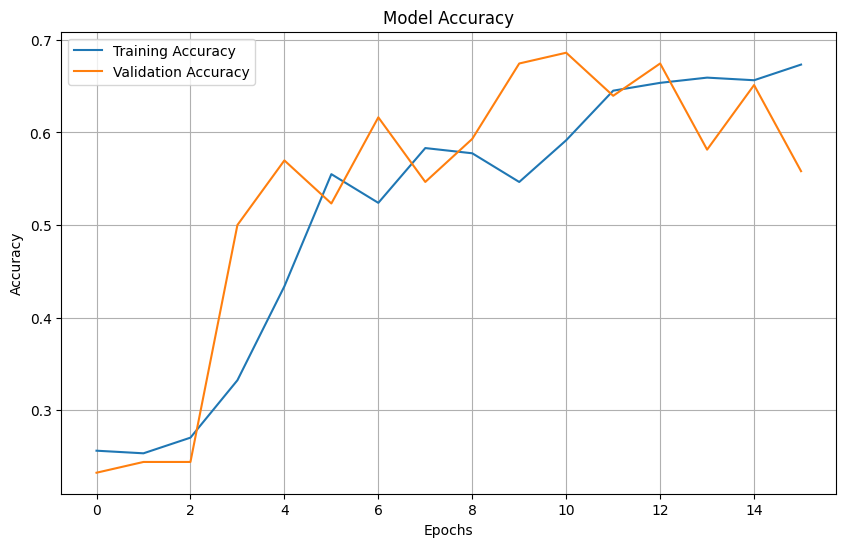

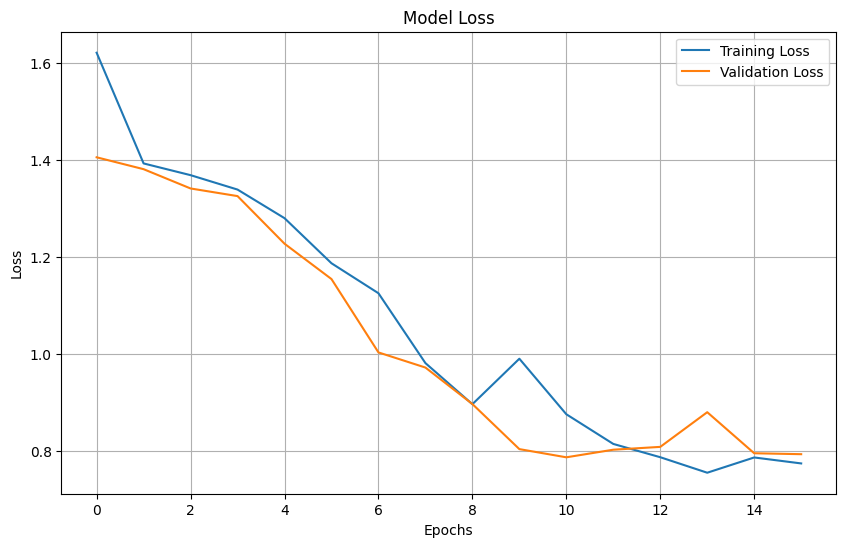

In [ ]:
import matplotlib.pyplot as plt

# Plot Akurasi
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import shutil
from google.colab import files

# Kompres direktori sample_data menjadi file ZIP
shutil.make_archive('sample_data', 'zip', '/content/sample_data')

# Unduh file ZIP
files.download('sample_data.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Proses megupload sample

In [ ]:
from google.colab import files

# Upload a file
uploaded = files.upload()

In [ ]:
classes = list(train_gen.class_indices.keys())
print("Daftar kelas:", classes)

In [ ]:
from PIL import Image
import io
import cv2
import numpy as np

# Ambil nama file dari upload
file_name = next(iter(uploaded))
img = Image.open(io.BytesIO(uploaded[file_name]))

# Ubah gambar dari format PIL ke array NumPy
img = np.array(img)

# Ubah ukuran gambar menggunakan OpenCV
image = cv2.resize(img, (100, 100))

# Pastikan bentuk (shape) sesuai dengan input model
image = np.reshape(image, (1, 100, 100, 3))

# Prediksi kelas gambar
prediksi = model.predict(image)
predicted_class = np.argmax(prediksi, axis=1)

predicted_label = classes[predicted_class[0]]

print("Prediksinya adalah ", predicted_label)


In [ ]:
print("prediksinya adalah ",prediksi)

# membuat confussion matriks


In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = test_generator.flow_from_directory(
    '/root/.cache/kagglehub/datasets/zalfahumaira/isyarat-kata-sibi/versions/1/IsyaratKata/',
    target_size=(100,100),
    batch_size=32,
    shuffle=False
)


In [ ]:
print(model.summary())


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = test_data_generator.classes
y_pred = np.argmax(model.predict(test_data_generator), axis=-1)

cm = confusion_matrix(y_true, y_pred)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data_generator.class_indices.keys())
cmd.plot(cmap='Blues')

plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

prediksi = model.predict(test_data_generator)


y_pred = np.argmax(prediksi, axis=1)

print("=========Confustion=============")

print(confusion_matrix(test_data_generator.classes,y_pred))


In [ ]:
print("============HAsil=============")

print(classification_report(test_data_generator.classes,y_pred))